<a href="https://colab.research.google.com/github/matinmazid/York_ML_certificate/blob/master/project2_individual/financial_categorization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

The goal is to classify records as one category or an other of financial tweets. The goal here is to help users to quickly sort through their tweets to help them find relevant financial data.
We can uncomment as necessary

In [1]:
!pip install xgboost
!pip install scikit-learn==1.5.2
#!conda install -c conda-forge py-xgboost-cpu
#!conda install -c conda-forge py-xgboost-gpu
!pip install spacy
!python -m spacy download en_core_web_sm


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 48.4 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


In [2]:
!ls

drive  sample_data


In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [75]:
import nltk
nltk.download('words')
nltk.download('punkt')
nltk.download('punkt_tab')

[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Package words is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

The goal here is to categorize tweets to help users quickly sort thought the influx of information in their twitter feed.

This corpus already comes classifed with integers, where
"0": "Analyst Update",
"1": "Fed | Central Banks",
"2": "Company | Product News",
"3": "Treasuries | Corporate Debt",
"4": "Dividend",
"5": "Earnings",
"6": "Energy | Oil",
"7": "Financials",
"8": "Currencies",
"9": "General News | Opinion",
"10": "Gold | Metals | Materials",
"11": "IPO",
"12": "Legal | Regulation",
"13": "M&A | Investments",
"14": "Macro",
"15": "Markets",
"16": "Politics",
"17": "Personnel Change",
"18": "Stock Commentary",
"19": "Stock Movement"

In [103]:
# https://www.kaggle.com/code/ahmadalijamali/twitter-financial-news-nlp-analysis-and-prediction/notebook
import pandas as pd

#df=pd.read_csv("./data/train_data.csv")
df=pd.read_csv("/content/drive/MyDrive/ColabNotebooks/ml_200_individual/train_data.csv")

CATEGORY_LOOKUP={
    0: "Analyst Update",
    1: "Fed | Central Banks",
    2: "Company | Product News",
    3: "Treasuries | Corporate Debt",
    4: "Dividend",
    5: "Earnings",
    6: "Energy | Oil",
    7: "Financials",
    8: "Currencies",
    9: "General News | Opinion",
    10: "Gold | Metals | Materials",
    11: "IPO",
    12: "Legal | Regulation",
    13: "M&A | Investments",
    14: "Macro",
    15: "Markets",
    16: "Politics",
    17: "Personnel Change",
    18: "Stock Commentary",
    19: "Stock Movement"
}

In [104]:
df.head()

,text,label
0,"Here are Thursday's biggest analyst calls: Apple, Amazon, Tesla, Palantir, DocuSign, Exxon &amp; more https://t.co/QPN8Gwl7Uh",0
1,"Buy Las Vegas Sands as travel to Singapore builds, Wells Fargo says https://t.co/fLS2w57iCz",0
2,"Piper Sandler downgrades DocuSign to sell, citing elevated risks amid CEO transition https://t.co/1EmtywmYpr",0
3,"Analysts react to Tesla's latest earnings, break down what's next for electric car maker https://t.co/kwhoE6W06u",0
4,"Netflix and its peers are set for a ‘return to growth,’ analysts say, giving one stock 120% upside https://t.co/jPpdl0D9s4",0


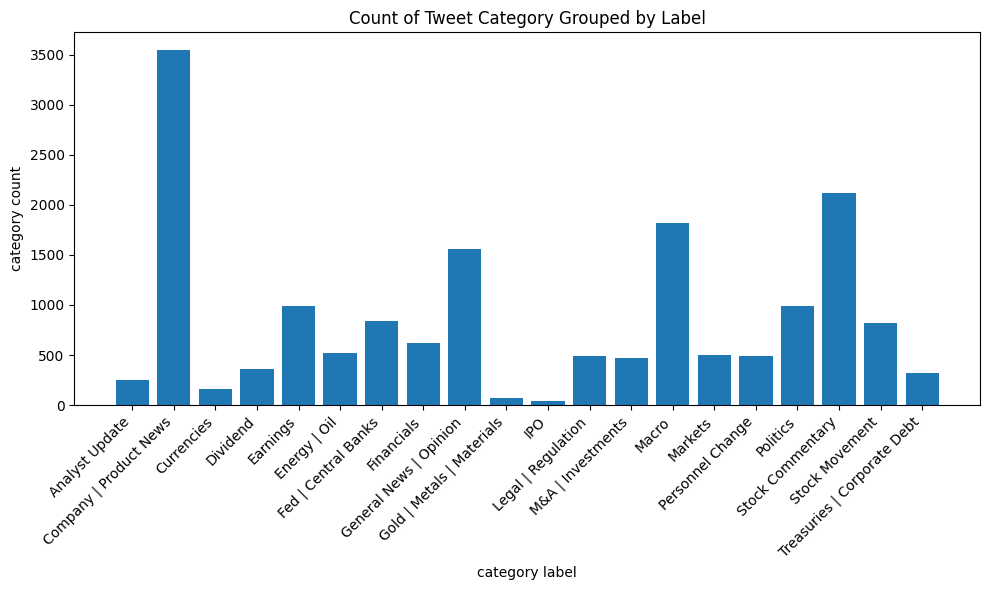

In [105]:
import pandas as pd
import matplotlib.pyplot as plt

#create a text_label field
df["text_label"]=df["label"].apply(lambda x: CATEGORY_LOOKUP[x])
label_text_counts_series=df.groupby("text_label")["text"].count()

groupbyDF=pd.DataFrame(label_text_counts_series)

groupbyDF.rename(columns={"text":"count"},inplace=True)
groupbyDF.reset_index(inplace=True)

# #Create the plot
plt.figure(figsize=(10, 6))  # Adjust figure size if needed
plt.bar(groupbyDF['text_label'], groupbyDF['count'])

plt.xlabel("category label")
plt.ylabel("category count")
plt.title("Count of Tweet Category Grouped by Label")
plt.xticks(range(len(groupbyDF['text_label'])), groupbyDF['text_label'], rotation=45, ha='right')
plt.tight_layout()  # Adjust layout for better spacing
plt.show()





In [106]:
pd.set_option('display.max_colwidth', None)
df.groupby("text_label").sample(1)


,text,label,text_label
159,$EB - Eventbrite initiated with a sector weight at KeyBanc https://t.co/FYKYj7SvJt,0,Analyst Update
2991,PANASONIC TO BUILD EV BATTERY PLANT FOR TESLA IN U.S. STATE OF KANSAS - NIKKEI,2,Company | Product News
3817,What does this mean for the dollar? https://t.co/LR1lY6DUkB,8,Currencies
4287,$WINA - Winmark declares $0.70 dividend https://t.co/pcN7hCqMSg,4,Dividend
5019,"$STLD - Steel Dynamics: Q2 Earnings, Combined Annualized Yield Of 16%. https://t.co/JwZ6h6KoX7 #trading #stockmarket #investing",5,Earnings
5763,"China’s appetite for cheap Russian oil continues to reverberate through the global market, with buyers being offered their favorite crude from the OPEC+ producer at a deep discount to similar-quality barrels https://t.co/3ZwtPmSqA4",6,Energy | Oil
6101,Bank of Korea Raises Rate by Half Percentage Point https://t.co/jhg30ttRT8,1,Fed | Central Banks
7079,"$TANH - Tantech Holdings GAAP EPS of -$2.01, revenue of $55.3M https://t.co/yhuIpYtqux",7,Financials
8777,From Breakingviews - Deal gamblers didn’t heed 2020’s lesson https://t.co/9YGZUBhrfg,9,General News | Opinion
8897,Gold Miners Battle Great Expectations. https://t.co/7mP3UAmdm2 #business #finance #trading,10,Gold | Metals | Materials


Here we see that there are dollars signs and urls

Clen up date
change % to percent </br>
change html ecape '&amp'; '&lt'; '&gt'; and, less than, greater than respectively </br>
change &, <, > as above

We also want to remove any other non ascii character after translating the above.

we want to use a standard list of stop words


In [107]:

import re
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.tokenize.toktok import ToktokTokenizer

stopword_list = nltk.corpus.stopwords.words("english")

# there is no  symantic information in a url on its own
# we'd have to get the url's content but there are also paywall issues.
# we also want to compile this regex outside of any loops
myUrlFinder=re.compile(r'(.*)(http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\(\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+)(.*)')



def clean_text(text):
    text = text.replace("%", " percent ")
    text = text.replace("&amp;", " and ")
    text = text.replace("&lt;", "<")
    text = text.replace("&gt;", ">")
    text = text.replace("<", " less than ")
    text = text.replace(">", " greater than ")
    # the $ is abmigous, sometimes its related to a symbol, sometimes its related
    # to a dollar amount.
    text = text.replace("$", "")
    #remove non ascii char


    matches=myUrlFinder.match(text)
    # put the string back together
    while matches:
      text=matches.group(1)+" "+matches.group(3)
      matches=myUrlFinder.match(text)


    text= re.sub(r"[^A-Za-z0-9 ]","",text,flags=re.IGNORECASE)
    text=text.lower()
    tokenizer=ToktokTokenizer()
    tokens=tokenizer.tokenize(text)
    tokens=[word for word in tokens if word not in stopword_list]
    text=" ".join(tokens)
    return text

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [108]:
df["cleaned_text"]=df["text"].apply(clean_text)

In [109]:
df.groupby("text_label").sample(1,random_state=100)

,text,label,text_label,cleaned_text
115,"$INTC - Susquehanna cautious on Intel going into Q2, citing 'deteriorating PC demand' https://t.co/gM2iS1DUCJ",0,Analyst Update,intc susquehanna cautious intel going q2 citing deteriorating pc demand
2194,New Lamps Plus Store-Based Customer Care Team Allows Certified Professional Sales Agents to Assist both Pro Industry Clientele and Store Customers https://t.co/VhieLGyd1x https://t.co/ui7jvFa3p7,2,Company | Product News,new lamps plus storebased customer care team allows certified professional sales agents assist pro industry clientele store customers
3893,PBoC Sets Yuan Mid-Point At 6.7287 / Dlr VS Last Close 6.7140,8,Currencies,pboc sets yuan midpoint 67287 dlr vs last close 67140
4204,$BSCE - Invesco BulletShares 2023 USD Emerging Markets Debt ETF declares monthly distribution of $0.0458 https://t.co/OAberGJnwv,4,Dividend,bsce invesco bulletshares 2023 usd emerging markets debt etf declares monthly distribution 00458
4927,$DFS - Discover Financial Services Q2 2022 Earnings Preview https://t.co/Guh1DSwcci,5,Earnings,dfs discover financial services q2 2022 earnings preview
5384,Copper rout worsens as recession fears hammer commodities markets https://t.co/bRIUzyr8c1,6,Energy | Oil,copper rout worsens recession fears hammer commodities markets
6352,"Traders See 175Bps BoE Hikes By Year-End, First Time In Three Weeks",1,Fed | Central Banks,traders see 175bps boe hikes yearend first time three weeks
6863,"Netflix lost 970,000 subscribers in Q2, beating Wall Street estimates by over 1 million https://t.co/bJWp7aZVn4",7,Financials,netflix lost 970000 subscribers q2 beating wall street estimates 1 million
7670,Jennifer Lopez and Ben Affleck were wed Saturday in a late-night Las Vegas drive-through chapel https://t.co/f4JLwCUVoO,9,General News | Opinion,jennifer lopez ben affleck wed saturday latenight las vegas drivethrough chapel
8865,$COMDX: Metals Settlement Prices https://t.co/3Xii3Fx8cW,10,Gold | Metals | Materials,comdx metals settlement prices


In [110]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import xgboost as xgb

In [111]:
texts_train, texts_test, labels_train, labels_test, indices_train, indices_test  = train_test_split(df["cleaned_text"], df["label"], df.index,test_size=0.2, random_state=42)

In [112]:
vectorizer = TfidfVectorizer()
X_train = vectorizer.fit_transform(texts_train)
X_test = vectorizer.transform(texts_test)

In [88]:
# Train the XGBoost model
model = xgb.XGBClassifier(n_jobs=-1)
model.fit(X_train, labels_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=-1,
              num_parallel_tree=None, objective='multi:softprob', ...)

In [113]:
texts_train.head()
labels_train.loc[12164]
# save a copy of df for later
save_df=df.copy()

In [90]:
#us bank stocks jumped nearly two months friday citigroups strong secondquarter results helping lift sentiment entire sector -> markets
model.predict(vectorizer.transform(["us bank stocks jumped nearly two months friday citigroups strong secondquarter results helping lift sentiment entire sector"]))

array([15])

The overall accruacy isnt very good. We should look at how we can tune this model

In [114]:
# Make predictions on the test set
predictions = model.predict(X_test)

# Evaluate the model performance
accuracy = accuracy_score(labels_test, predictions)
print("Accuracy: {:.2f}%".format(accuracy * 100))

Accuracy: 77.58%


In [115]:
from sklearn.metrics import classification_report
print(classification_report(labels_test, predictions))

              precision    recall  f1-score   support

           0       0.69      0.51      0.59        49
           1       0.90      0.86      0.88       193
           2       0.65      0.87      0.75       690
           3       0.75      0.66      0.70        73
           4       0.99      0.90      0.94        80
           5       0.90      0.96      0.93       205
           6       0.85      0.79      0.82       107
           7       0.94      0.83      0.88       125
           8       0.68      0.70      0.69        30
           9       0.72      0.55      0.62       319
          10       0.65      0.58      0.61        19
          11       0.86      0.75      0.80         8
          12       0.85      0.72      0.78        93
          13       0.78      0.60      0.68        96
          14       0.79      0.78      0.79       366
          15       0.72      0.70      0.71        90
          16       0.84      0.81      0.82       169
          17       0.80    

Lets take a closer look at what our problems are

If we take a look at the confusion matrix. We see that the product news and company/product news and general news are very closely correlated.
We may have to look for something else to help us decide between the two
or aggregate the category.

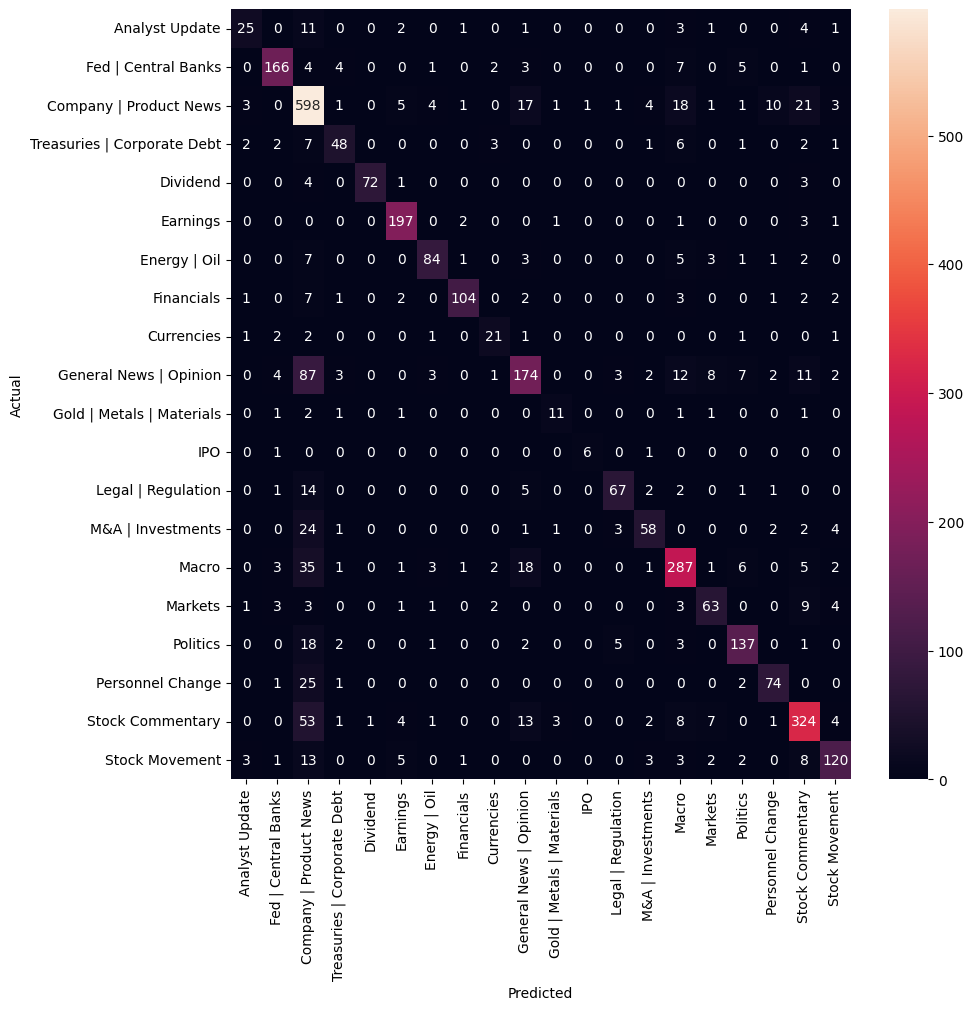

In [116]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

category_id_df = df[['text_label', 'label']].drop_duplicates().sort_values('label')

conf_mat = confusion_matrix(labels_test , predictions)
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(conf_mat, annot=True, fmt='d',
            xticklabels=category_id_df.text_label.values, yticklabels=category_id_df.text_label.values)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

Lets take a look at a sample of compan news and product news.

In [117]:
a1=df[(df["label"]==2)].sample(3)
a2=df[(df["label"]==9)].sample(3)

b=pd.concat([a1,a2],axis=0)
b

,text,label,text_label,cleaned_text
2916,$EQT $ETRN - EQT takes $196M cash option in Mountain Valley gas gathering deal https://t.co/tQ77WKl4Ee,2,Company | Product News,eqt etrn eqt takes 196m cash option mountain valley gas gathering deal
3316,$ORCL - Oracle's Competitive Advantages Portend Continued Profit Growth. https://t.co/E9yKAobrdz #business #stockmarket #stocks,2,Company | Product News,orcl oracles competitive advantages portend continued profit growth business stockmarket stocks
1193,Finotta Selected to Demo at FinovateFall 2022 https://t.co/vGHBClb0d3 https://t.co/ABNUuxcWmT,2,Company | Product News,finotta selected demo finovatefall 2022
8605,here's my video from Friday,9,General News | Opinion,heres video friday
7663,"Channel 4 is making a documentary series about Boris Johnson, uncovering the events that shaped the man, his rise to power and his premiership https://t.co/nSZktLkGox",9,General News | Opinion,channel 4 making documentary series boris johnson uncovering events shaped man rise power premiership
8053,"About 46% of Black employees at UK firms intend to quit their current place of work in the next two years or sooner, according to new research https://t.co/tmLh63RRd6",9,General News | Opinion,46 percent black employees uk firms intend quit current place work next two years sooner according new research


In [118]:
model.predict(vectorizer.transform(["Xtrackers UK Regulatory Announcement: Net Asset Value(s) https://t.co/sbfWY3ogDr https://t.co/ANhYDZzoU9"]))

array([2])

In [99]:
#lets add back the text and look for the mis labeled classes.
xx=pd.DataFrame(labels_test)
withPredictions=xx.assign(prediction=predictions)
withPredictionsAndText=pd.merge(withPredictions,df,left_index=True,right_index=True)
withPredictionsAndText.head()


,label_x,prediction,text,label_y,text_label,cleaned_text
4768,5,5,Emera Teleconference on August 10 to Discuss Q2 2022 Results https://t.co/KoJxf8sSP9 https://t.co/n7VzfukXWf,5,Earnings,emera teleconference august 10 discuss q2 2022 results
8983,12,16,"Feds say 2 NY residents used Trump fundraiser, photo in $27M investment scam https://t.co/5EobtnCBTT",12,Legal | Regulation,feds say 2 ny residents used trump fundraiser photo 27m investment scam
14959,18,18,"TAP, TAP, TAP, 21-ema broken across the board; $SPY $QQQ $DIA $XLF A little follow-through instead of a gap-up would be grrrreat. https://t.co/TZDmGQBbGu",18,Stock Commentary,tap tap tap 21ema broken across board spy qqq dia xlf little followthrough instead gapup would grrrreat
11299,14,14,Electricity use in Texas soared to a record high for the ninth time this year as extreme heat and the rapidly growing local economy tests the state’s grid https://t.co/bCu6ICNwdz,14,Macro,electricity use texas soared record high ninth time year extreme heat rapidly growing local economy tests states grid
5018,5,5,$WIT - Wipro Limited 2023 Q1 - Results - Earnings Call Presentation. https://t.co/ByLaADsRLA #markets #economy #stocks,5,Earnings,wit wipro limited 2023 q1 results earnings call presentation markets economy stocks


In [100]:
withPredictionsAndText["predictedText"]=withPredictionsAndText["prediction"].apply(lambda x: CATEGORY_LOOKUP[x])
withPredictionsAndText["actualText"]=withPredictionsAndText["label_x"].apply(lambda x: CATEGORY_LOOKUP[x])
withPredictionsAndText[(withPredictionsAndText["prediction"]!=withPredictionsAndText["label_x"])]

,label_x,prediction,text,label_y,text_label,cleaned_text,predictedText,actualText
8983,12,16,"Feds say 2 NY residents used Trump fundraiser, photo in $27M investment scam https://t.co/5EobtnCBTT",12,Legal | Regulation,feds say 2 ny residents used trump fundraiser photo 27m investment scam,Politics,Legal | Regulation
12918,16,2,Ex-Trump adviser Bannon says he is willing to testify to January 6 panel https://t.co/ZQ9t8OmEe5,16,Politics,extrump adviser bannon says willing testify january 6 panel,Company | Product News,Politics
6301,1,14,Eurozone Deposit Facility Rate Jul 21: 0.000% (est -0.250%; prev -0.500%) - Eurozone Main Refinancing Rate Jul 21: 0.500% (est 0.250%; prev 0.000%) - Eurozone Marginal Lending Facility Jul 21: 0.750% (est 0.500%; prev 0.250%),1,Fed | Central Banks,eurozone deposit facility rate jul 21 0000 percent est 0250 percent prev 0500 percent eurozone main refinancing rate jul 21 0500 percent est 0250 percent prev 0000 percent eurozone marginal lending facility jul 21 0750 percent est 0500 percent prev 0250 percent,Macro,Fed | Central Banks
9051,12,2,SHAREHOLDER ACTION REMINDER: The Schall Law Firm Encourages Purchasers of Celsius Network LLC’s Financial Products with Losses to Contact the Firm https://t.co/2sFyD7h9k2 https://t.co/kEjp1RWJuE,12,Legal | Regulation,shareholder action reminder schall law firm encourages purchasers celsius network llcs financial products losses contact firm,Company | Product News,Legal | Regulation
14532,18,9,"@dshamanaman @I_MT978 Looks like $TWTR got it, thanks Dave!",18,Stock Commentary,dshamanaman imt978 looks like twtr got thanks dave,General News | Opinion,Stock Commentary
...,...,...,...,...,...,...,...,...
16843,3,14,Treasury inflation-protected securities (TIPS) can provide insight into long-term inflation expectations. What are investors saying about future inflation? https://t.co/A63iwhuQWv https://t.co/mR9rZna2oj,3,Treasuries | Corporate Debt,treasury inflationprotected securities tips provide insight longterm inflation expectations investors saying future inflation,Macro,Treasuries | Corporate Debt
16867,3,18,US 10-Year Note Sale: - High Yield Rate: 2.960% (prev 3.030%) - Bid-Cover Ratio: 2.34 (prev 2.41) - Direct Accepted: 18.0% (prev 19.4%) - Indirect Accepted: 61.3% (prev 63.6%) - WI: 2.940%,3,Treasuries | Corporate Debt,us 10year note sale high yield rate 2960 percent prev 3030 percent bidcover ratio 234 prev 241 direct accepted 180 percent prev 194 percent indirect accepted 613 percent prev 636 percent wi 2940 percent,Stock Commentary,Treasuries | Corporate Debt
9675,13,2,Versant Diagnostics Strengthens Chicago-Area Presence with New Acquisitions https://t.co/jh0IcBJ23A https://t.co/jia0Ve7D1k,13,M&A | Investments,versant diagnostics strengthens chicagoarea presence new acquisitions,Company | Product News,M&A | Investments
14194,18,2,"DDOG, SNOW, ZM - some big early moves in Software with Yields lower",18,Stock Commentary,ddog snow zm big early moves software yields lower,Company | Product News,Stock Commentary


In [120]:
model.predict(vectorizer.transform(["extrump adviser bannon says willing testify january 6 panel"]))

array([2])

In [129]:
model.predict(vectorizer.transform(["Black gun rights groups are touting the Supreme Court ruling as an important vindication of their rights to self-defense https://t.co/sUT8NXClFH"]))

array([16])

So we can se from the above 2 cells that perhaps we can just place the orginal text and our mistake was in verification, not in training the model

In [127]:
# Make predictions on the test set
a, texts_test, b, labels_test, indices_train, indices_test  = train_test_split(df["text"], df["label"], df.index,test_size=0.2, random_state=42)
predictions_from_unclean = model.predict(vectorizer.transform( texts_test))

# Evaluate the model performance
accuracy = accuracy_score(labels_test, predictions)
print("Accuracy: {:.2f}%".format(accuracy * 100))

Accuracy: 77.58%


In [128]:
texts_test

,text
4768,Emera Teleconference on August 10 to Discuss Q2 2022 Results https://t.co/KoJxf8sSP9 https://t.co/n7VzfukXWf
8983,"Feds say 2 NY residents used Trump fundraiser, photo in $27M investment scam https://t.co/5EobtnCBTT"
14959,"TAP, TAP, TAP, 21-ema broken across the board; $SPY $QQQ $DIA $XLF A little follow-through instead of a gap-up would be grrrreat. https://t.co/TZDmGQBbGu"
11299,Electricity use in Texas soared to a record high for the ninth time this year as extreme heat and the rapidly growing local economy tests the state’s grid https://t.co/bCu6ICNwdz
5018,$WIT - Wipro Limited 2023 Q1 - Results - Earnings Call Presentation. https://t.co/ByLaADsRLA #markets #economy #stocks
...,...
16945,Petrobras debuted in the green financing market with a $1.25 billion sustainability-linked loan as Brazil’s oil giant looks to court environmentally conscious investors https://t.co/mQkRsBfBax
9985,Over $31 billion in trade is rail-landlocked or stuck at anchor off U.S. coasts https://t.co/KNzUL95U3L
1744,"Six Flags Offers Thrills, Inclusivity and Safety for Everyone https://t.co/LdICsBxkGZ https://t.co/GEehym8Gsn"
7646,"Despite the summer heat, investors are uneasy about the current crypto climate https://t.co/Xa9IATIjIV"


"0": "Analyst Update", "1": "Fed | Central Banks", "2": "Company | Product News", "3": "Treasuries | Corporate Debt", "4": "Dividend", "5": "Earnings", "6": "Energy | Oil", "7": "Financials", "8": "Currencies", "9": "General News | Opinion", "10": "Gold | Metals | Materials", "11": "IPO", "12": "Legal | Regulation", "13": "M&A | Investments", "14": "Macro", "15": "Markets", "16": "Politics", "17": "Personnel Change", "18": "Stock Commentary", "19": "Stock Movement"

Lets try to undersample the majority ie. where label==2

In [145]:
from sklearn.utils import resample
import pandas as pd

resample_df=save_df.copy()


df_majority = resample_df[resample_df['label'] == 2]  # Records where label is 2 (majority class)
df_minority = resample_df[resample_df['label'] != 2]  # All records where label is not 2

# Undersample majority class
n_samples=2300
df_majority_undersampled = resample(df_majority,
                                    replace=False,  # Sample without replacement
                                    n_samples=n_samples,  # Match minority class size
                                    random_state=454)  # Set random state for reproducibility

# Combine undersampled majority class with minority class
df_undersampled = pd.concat([df_majority_undersampled, df_minority])

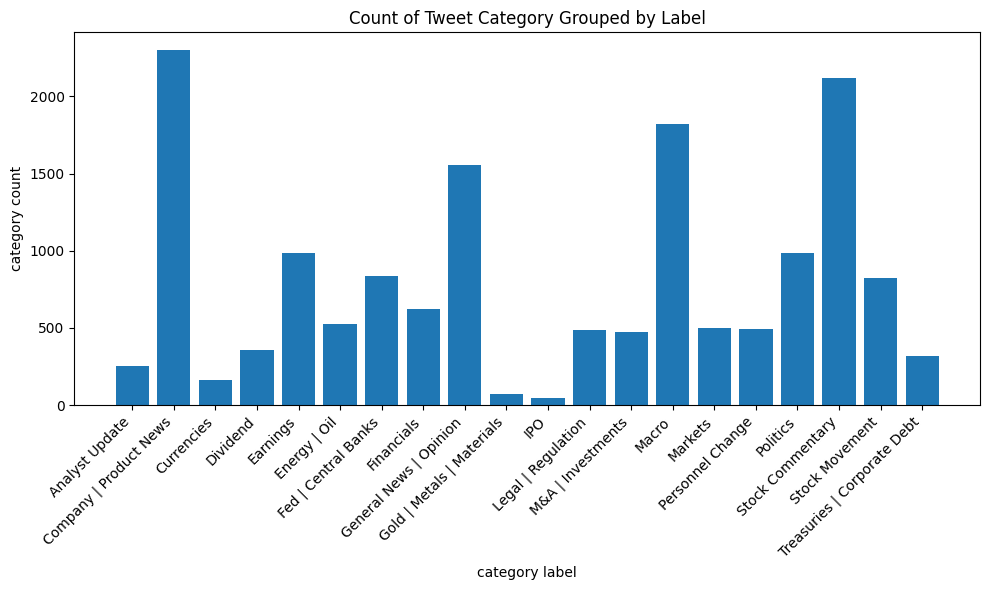

In [146]:
label_text_counts_series=df_undersampled.groupby("text_label")["text"].count()

groupbyDF=pd.DataFrame(label_text_counts_series)

groupbyDF.rename(columns={"text":"count"},inplace=True)
groupbyDF.reset_index(inplace=True)

# #Create the plot
plt.figure(figsize=(10, 6))  # Adjust figure size if needed
plt.bar(groupbyDF['text_label'], groupbyDF['count'])

plt.xlabel("category label")
plt.ylabel("category count")
plt.title("Count of Tweet Category Grouped by Label")
plt.xticks(range(len(groupbyDF['text_label'])), groupbyDF['text_label'], rotation=45, ha='right')
plt.tight_layout()  # Adjust layout for better spacing
plt.show()

In [147]:
df_undersampled

,text,label,text_label,cleaned_text
472,$LPSN: LivePerson announces agreement with Starboard Value LP https://t.co/KuporWVN0Y,2,Company | Product News,lpsn liveperson announces agreement starboard value lp
2465,Ready for Amazon #PrimeDay 2022? Here's everything you need to know. https://t.co/Bp8nky5dTB,2,Company | Product News,ready amazon primeday 2022 heres everything need know
842,Aural Analytics Partners with Medidata and its Sensor Cloud Network https://t.co/98ziflWaPS https://t.co/NNavdChBqB,2,Company | Product News,aural analytics partners medidata sensor cloud network
524,$TTE: TotalEnergies SE has definitively withdrawn from Myanmar https://t.co/yt0eNKW3Sw,2,Company | Product News,tte totalenergies se definitively withdrawn myanmar
1676,IDX Announces Electronic Trading Platform for Securitized Products https://t.co/CWqZKKESgh,2,Company | Product News,idx announces electronic trading platform securitized products
...,...,...,...,...
16985,KfW credit line for Uniper could be raised to 8 bln eur - Handelsblatt https://t.co/7R6tAf7Uvh https://t.co/MB3mYmgioL,3,Treasuries | Corporate Debt,kfw credit line uniper could raised 8 bln eur handelsblatt
16986,KfW credit line for Uniper could be raised to 8 bln eur - Handelsblatt https://t.co/uUt1tAs1MP https://t.co/MABlvCJcjC,3,Treasuries | Corporate Debt,kfw credit line uniper could raised 8 bln eur handelsblatt
16987,Russian https://t.co/R0iPhyo5p7 sells 1 bln roubles at one-year repo auction https://t.co/ItClQUPQXd https://t.co/0Bk4mEHzKP,3,Treasuries | Corporate Debt,russian sells 1 bln roubles oneyear repo auction
16988,Global ESG bond issuance posts H1 dip as supranationals cut back https://t.co/Yx4QZvynwq https://t.co/xW6GniaqST,3,Treasuries | Corporate Debt,global esg bond issuance posts h1 dip supranationals cut back


In [148]:
#r_ so we dont over write the values above
r_texts_train, r_texts_test, r_labels_train, r_labels_test, r_indices_train, r_indices_test  = train_test_split(df_undersampled["cleaned_text"], df_undersampled["label"], df_undersampled.index,test_size=0.2, random_state=42)

In [149]:
r_X_train = vectorizer.fit_transform(r_texts_train)
r_X_test = vectorizer.transform(r_texts_test)
r_model = xgb.XGBClassifier(n_jobs=-1)
model.fit(r_X_train, r_labels_train)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=-1,
              num_parallel_tree=None, objective='multi:softprob', ...)

In [150]:
# Make predictions on the test set
r_predictions = model.predict(r_X_test)

# Evaluate the model performance
accuracy = accuracy_score(r_labels_test, r_predictions)
print("Accuracy: {:.2f}%".format(accuracy * 100))
print(classification_report(r_labels_test, r_predictions))

Accuracy: 76.37%
              precision    recall  f1-score   support

           0       0.75      0.41      0.53        59
           1       0.89      0.88      0.89       187
           2       0.57      0.72      0.63       444
           3       0.81      0.80      0.80        64
           4       0.91      0.91      0.91        70
           5       0.92      0.95      0.93       205
           6       0.82      0.75      0.78       115
           7       0.85      0.84      0.84       122
           8       0.71      0.71      0.71        28
           9       0.69      0.58      0.63       315
          10       0.75      0.55      0.63        11
          11       1.00      0.88      0.93         8
          12       0.88      0.64      0.74       101
          13       0.80      0.73      0.76        89
          14       0.73      0.80      0.77       375
          15       0.82      0.72      0.76        99
          16       0.92      0.80      0.86       203
          